## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0713 00:40:15.287607 10116 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 00:40:15.303608 10116 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 00:40:15.306608 10116 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 00:40:15.426615 10116 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 00:40:15.434616 10116 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 00:40:15.541622 10116 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 00:40:15.652628 10116 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 16s 314us/step - loss: 2.2629 - acc: 0.1550 - val_loss: 2.2109 - val_acc: 0.2076
Epoch 2/500
50000/50000 [==============================] - 18s 354us/step - loss: 2.1777 - acc: 0.2365 - val_loss: 2.1470 - val_acc: 0.2587
Epoch 3/500
50000/50000 [==============================] - 18s 352us/step - loss: 2.1192 - acc: 0.2721 - val_loss: 2.0958 - val_acc: 0.2818
Epoch 4/500
50000/50000 [==============================] - 18s 358us/step - loss: 2.0726 - acc: 0.2880 - val_loss: 2.0545 - val_acc: 0.2978
Epoch 5/500
50000/50000 [==============================] - 17s 346us/step - loss: 2.0339 - acc: 0.3044 - val_loss: 2.0184 - val_acc: 0.3044
Epoch 6/500
50000/50000 [==============================] - 17s 346us/step - loss: 2.0018 - acc: 0.3118 - val_loss: 1.9894 - val_acc: 0.3107
Epoch 7/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.9747 - acc: 0.3198 - val_l

Epoch 59/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.6489 - acc: 0.4241 - val_loss: 1.6540 - val_acc: 0.4168
Epoch 60/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.6463 - acc: 0.4266 - val_loss: 1.6507 - val_acc: 0.4198
Epoch 61/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.6433 - acc: 0.4270 - val_loss: 1.6498 - val_acc: 0.4174
Epoch 62/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.6404 - acc: 0.4284 - val_loss: 1.6523 - val_acc: 0.4183
Epoch 63/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.6380 - acc: 0.4288 - val_loss: 1.6429 - val_acc: 0.4203
Epoch 64/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.6350 - acc: 0.4311 - val_loss: 1.6448 - val_acc: 0.4240
Epoch 65/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.6323 - acc: 0.4315 - val_loss: 1.6379 - val_acc: 0.4230
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.5162 - acc: 0.4719 - val_loss: 1.5433 - val_acc: 0.4605
Epoch 118/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.5143 - acc: 0.4724 - val_loss: 1.5392 - val_acc: 0.4598
Epoch 119/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.5127 - acc: 0.4735 - val_loss: 1.5432 - val_acc: 0.4530
Epoch 120/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.5107 - acc: 0.4727 - val_loss: 1.5379 - val_acc: 0.4582
Epoch 121/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.5089 - acc: 0.4737 - val_loss: 1.5363 - val_acc: 0.4592
Epoch 122/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.5068 - acc: 0.4751 - val_loss: 1.5349 - val_acc: 0.4603
Epoch 123/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.5053 - acc: 0.4758 - val_loss: 1.5420 - val_acc: 0.4578
Epoch 

50000/50000 [==============================] - 18s 355us/step - loss: 1.4211 - acc: 0.5027 - val_loss: 1.4741 - val_acc: 0.4779
Epoch 175/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.4201 - acc: 0.5046 - val_loss: 1.4727 - val_acc: 0.4835
Epoch 176/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.4183 - acc: 0.5032 - val_loss: 1.4709 - val_acc: 0.4819
Epoch 177/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.4168 - acc: 0.5045 - val_loss: 1.4721 - val_acc: 0.4820
Epoch 178/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.4152 - acc: 0.5056 - val_loss: 1.4664 - val_acc: 0.4827
Epoch 179/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.4141 - acc: 0.5047 - val_loss: 1.4657 - val_acc: 0.4854
Epoch 180/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.4120 - acc: 0.5050 - val_loss: 1.4805 - val_acc: 0.4787
Epoch 181/500
50000/

Epoch 232/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.3399 - acc: 0.5301 - val_loss: 1.4222 - val_acc: 0.4962
Epoch 233/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.3399 - acc: 0.5302 - val_loss: 1.4387 - val_acc: 0.4941
Epoch 234/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.3383 - acc: 0.5322 - val_loss: 1.4262 - val_acc: 0.4977
Epoch 235/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.3364 - acc: 0.5314 - val_loss: 1.4207 - val_acc: 0.4962
Epoch 236/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.3357 - acc: 0.5325 - val_loss: 1.4196 - val_acc: 0.4958
Epoch 237/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.3338 - acc: 0.5327 - val_loss: 1.4161 - val_acc: 0.4982
Epoch 238/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.3332 - acc: 0.5342 - val_loss: 1.4180 - val_acc: 0.5003
Epoch 

Epoch 290/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.2698 - acc: 0.5545 - val_loss: 1.3948 - val_acc: 0.5057
Epoch 291/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.2678 - acc: 0.5569 - val_loss: 1.3807 - val_acc: 0.5154
Epoch 292/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.2668 - acc: 0.5575 - val_loss: 1.3845 - val_acc: 0.5131
Epoch 293/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.2655 - acc: 0.5558 - val_loss: 1.3977 - val_acc: 0.5107
Epoch 294/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.2645 - acc: 0.5572 - val_loss: 1.3881 - val_acc: 0.5104
Epoch 295/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.2636 - acc: 0.5575 - val_loss: 1.4020 - val_acc: 0.5069
Epoch 296/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.2630 - acc: 0.5580 - val_loss: 1.3869 - val_acc: 0.5146
Epoch 

Epoch 348/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.2046 - acc: 0.5790 - val_loss: 1.3646 - val_acc: 0.5164
Epoch 349/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.2021 - acc: 0.5793 - val_loss: 1.3790 - val_acc: 0.5134
Epoch 350/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.2012 - acc: 0.5791 - val_loss: 1.4020 - val_acc: 0.4996
Epoch 351/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.2011 - acc: 0.5793 - val_loss: 1.3660 - val_acc: 0.5225
Epoch 352/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.1994 - acc: 0.5801 - val_loss: 1.3689 - val_acc: 0.5170
Epoch 353/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.1992 - acc: 0.5802 - val_loss: 1.3572 - val_acc: 0.5205
Epoch 354/500
50000/50000 [==============================] - 18s 353us/step - loss: 1.1967 - acc: 0.5811 - val_loss: 1.3598 - val_acc: 0.5235
Epoch 

50000/50000 [==============================] - 18s 355us/step - loss: 1.1429 - acc: 0.6003 - val_loss: 1.3430 - val_acc: 0.5282
Epoch 406/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.1416 - acc: 0.6027 - val_loss: 1.3561 - val_acc: 0.5198
Epoch 407/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.1422 - acc: 0.6023 - val_loss: 1.3557 - val_acc: 0.5242
Epoch 408/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.1408 - acc: 0.6012 - val_loss: 1.3688 - val_acc: 0.5198
Epoch 409/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.1402 - acc: 0.6036 - val_loss: 1.3480 - val_acc: 0.5243
Epoch 410/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.1380 - acc: 0.6024 - val_loss: 1.3758 - val_acc: 0.5216
Epoch 411/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.1380 - acc: 0.6036 - val_loss: 1.3554 - val_acc: 0.5221
Epoch 412/500
50000/

Epoch 463/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.0862 - acc: 0.6214 - val_loss: 1.3742 - val_acc: 0.5150
Epoch 464/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.0841 - acc: 0.6219 - val_loss: 1.3305 - val_acc: 0.5304
Epoch 465/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.0839 - acc: 0.6227 - val_loss: 1.3428 - val_acc: 0.5254
Epoch 466/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.0838 - acc: 0.6208 - val_loss: 1.3280 - val_acc: 0.5337
Epoch 467/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.0832 - acc: 0.6211 - val_loss: 1.3497 - val_acc: 0.5289
Epoch 468/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.0803 - acc: 0.6237 - val_loss: 1.3319 - val_acc: 0.5307
Epoch 469/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.0785 - acc: 0.6240 - val_loss: 1.3563 - val_acc: 0.5290
Epoch 

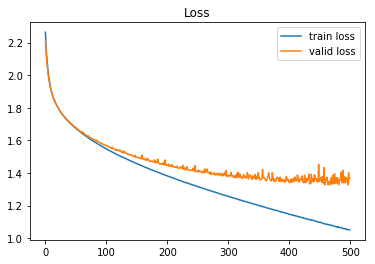

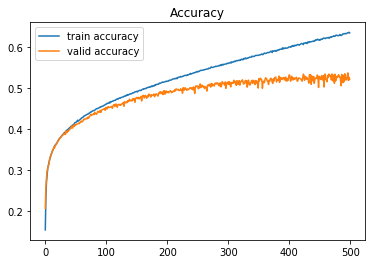

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()